In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from joblib import dump

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_label1 = pd.read_csv('/home/goblin1732/Desktop/iMa_linux/train_label1.csv',index_col=[0,1])
test_label1 = pd.read_csv('/home/goblin1732/Desktop/iMa_linux/test_label1.csv',index_col=[0,1])

In [3]:
train_group1 = pd.read_csv('/home/goblin1732/Desktop/iMa_linux/train_group1.csv',index_col=[0,1])
test_group1 = pd.read_csv('/home/goblin1732/Desktop/iMa_linux/test_group1.csv',index_col=[0,1])

In [4]:
std_pca_poly_train = np.load('/home/goblin1732/Desktop/iMa_linux/std_pca_poly_train.npy',allow_pickle=False)
std_pca_poly_test = np.load('/home/goblin1732/Desktop/iMa_linux/std_pca_poly_test.npy',allow_pickle=False)

# classifiers without meta-estimator method

## logit 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(max_iter=2000,penalty='l2',solver='lbfgs', tol=1e-7,class_weight = 'balanced',warm_start=False, verbose=3,n_jobs=7)
logreg.fit(std_pca_poly_train,np.ravel(train_label1))

prediction_logreg = cross_val_predict(logreg, std_pca_poly_test,test_label1, cv=3, n_jobs=7,verbose=3)
print(classification_report(test_label1, prediction_logreg))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed: 28.9min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


In [ ]:
cm_logreg = confusion_matrix(test_label1, prediction_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot() 

In [7]:
dump(logreg, 'logreg_poly.joblib') 

['logreg_poly.joblib']

## multi layer perceptron

In [8]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=1000, activation='logistic', solver='adam', 
                   alpha=0.05, batch_size='auto', learning_rate='invscaling', 
                   learning_rate_init=0.001, power_t=0.5, max_iter=500, 
                   shuffle=True, random_state=None, tol=0.0001, verbose=None,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                   early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                   beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

nn.fit(std_pca_poly_train,train_label1)

prediction_nn = cross_val_predict(nn, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_nn))

/Users/mk2/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     11526
           1       0.54      0.22      0.31      3618

    accuracy                           0.77     15144
   macro avg       0.67      0.58      0.59     15144
weighted avg       0.73      0.77      0.73     15144



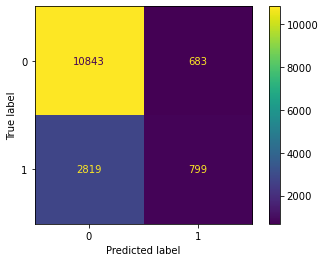

In [9]:
cm_nn = confusion_matrix(test_label1, prediction_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot() 

In [10]:
dump(nn, 'nn.joblib') 

['nn.joblib']

## gradient boost

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

gbc.fit(std_pca_poly_train,train_label1)

prediction_gbc = cross_val_predict(gbc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_gbc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11526
           1       0.59      0.27      0.37      3618

    accuracy                           0.78     15144
   macro avg       0.70      0.61      0.62     15144
weighted avg       0.75      0.78      0.75     15144



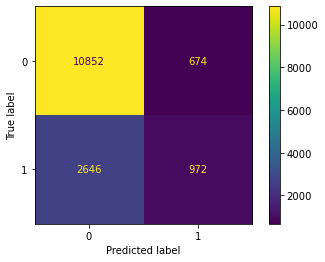

In [17]:
cm_gbc = confusion_matrix(test_label1, prediction_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp.plot() 

In [18]:
dump(gbc, 'gbc.joblib') 

['gbc.joblib']

## decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight='balanced', ccp_alpha=0.0)

dtc.fit(std_pca_poly_train,train_label1)

prediction_dtc = cross_val_predict(dtc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_dtc))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     11526
           1       0.36      0.35      0.35      3618

    accuracy                           0.69     15144
   macro avg       0.58      0.58      0.58     15144
weighted avg       0.69      0.69      0.69     15144



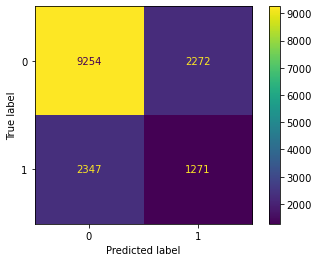

In [20]:
cm_dtc = confusion_matrix(test_label1, prediction_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc)
disp.plot() 

In [21]:
dump(dtc, 'dtc.joblib') 

['dtc.joblib']

## random forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                             warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)

rfc.fit(std_pca_poly_train,train_label1)

prediction_rfc = cross_val_predict(rfc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_rfc))

<ipython-input-22-99d917828388>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(std_pca_poly_train,train_label1)


              precision    recall  f1-score   support

           0       0.80      0.94      0.86     11526
           1       0.57      0.24      0.33      3618

    accuracy                           0.78     15144
   macro avg       0.68      0.59      0.60     15144
weighted avg       0.74      0.78      0.74     15144



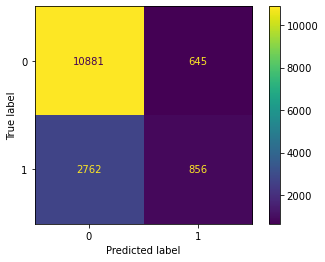

In [23]:
cm_rfc = confusion_matrix(test_label1, prediction_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot() 

In [24]:
dump(rfc, 'rfc.joblib') 

['rfc.joblib']

## stochastic gradient

In [25]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                     max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, 
                     random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                     early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, 
                     class_weight='balanced', warm_start=False, average=False)

sgdc.fit(std_pca_poly_train,train_label1)

prediction_sgdc = cross_val_predict(sgdc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_sgdc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.87      0.55      0.68     11526
           1       0.34      0.74      0.47      3618

    accuracy                           0.60     15144
   macro avg       0.61      0.65      0.57     15144
weighted avg       0.74      0.60      0.63     15144



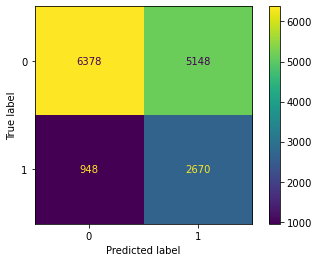

In [26]:
cm_sgdc = confusion_matrix(test_label1, prediction_sgdc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgdc)
disp.plot() 

In [27]:
dump(sgdc, 'sgdc.joblib') 

['sgdc.joblib']

## support vector machine

In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(penalty='l2', loss='squared_hinge',dual=True, tol=0.0001, C=1.0, 
                 multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                 verbose=0, random_state=None, max_iter=1000)

lsvc.fit(std_pca_poly_train,train_label1)

prediction_lsvc = cross_val_predict(lsvc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_lsvc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
cm_lsvc = confusion_matrix(test_label1, prediction_lsvc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvc)
disp.plot() 

In [ ]:
dump(lsvc, 'lsvc.joblib') 

## passive agressive clf

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, 
                                  validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, 
                                  loss='hinge', n_jobs=None, random_state=None, warm_start=False, 
                                  class_weight='balanced', average=False)

pac.fit(std_pca_poly_train,train_label1)

prediction_pac = cross_val_predict(pac, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_pac))

In [ ]:
cm_pac = confusion_matrix(test_label1, prediction_pac)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pac)
disp.plot() 

In [ ]:
dump(pac, 'pac.joblib') 

## ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier

rdgc = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, 
                       tol=0.001, class_weight='balanced', solver='auto', random_state=None)

rdgc.fit(std_pca_poly_train,train_label1)

prediction_rdgc = cross_val_predict(rdgc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_rdgc))

In [ ]:
cm_rdgc = confusion_matrix(test_label1, prediction_rdgc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rdgc)
disp.plot() 

In [ ]:
dump(rdgc, 'rdgc.joblib') 

## hist grad boost

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(loss='auto',learning_rate=0.1, max_iter=100, max_leaf_nodes=31, 
                                      max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, 
                                      monotonic_cst=None, warm_start=False, 
                                      early_stopping='auto', scoring='loss', validation_fraction=0.1, 
                                      n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)

hgbc.fit(std_pca_poly_train,train_label1)

prediction_hgbc = cross_val_predict(hgbc, std_pca_poly_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_hgbc))

In [ ]:
cm_hgbc = confusion_matrix(test_label1, prediction_hgbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_hgbc)
disp.plot() 

In [ ]:
dump(hgbc, 'hgbc_poly.joblib') 

## Result Comparison

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_nn).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_dtc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_rfc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_sgdc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_lsvc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_pac).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_rdgc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_hgbc).plot()